In [6]:
!pip install -q kaggle

In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kelshi","key":"d3ad4143048f90884b77de01ee70d7a7"}'}

In [9]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [10]:
! cp kaggle.json ~/.kaggle/

In [11]:
! chmod 600 ~/.kaggle/kaggle.json

In [12]:
! kaggle datasets list

ref                                                        title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023                 47KB  2023-08-26 11:04:57          19327        594  1.0              
aemyjutt/diabetesdataanslysis                              DiabetesDataAnslysis                              9KB  2023-09-23 13:48:24           1076         27  1.0              
joebeachcapital/students-performance                       Students Performance                              2KB  2023-08-31 00:50:11           6997        172  1.0              
nelgiriyewithana/credit-card-fraud-detection-dataset-2023  Credit Card Fraud Detection Dataset 2023      

In [13]:
!kaggle datasets download -d arjuntejaswi/plant-village

 98% 321M/329M [00:05<00:00, 28.0MB/s]
100% 329M/329M [00:05<00:00, 65.2MB/s]


In [14]:
import zipfile

In [15]:
zip_ref = zipfile.ZipFile('plant-village.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [17]:
import tensorflow as tf
from tensorflow.keras import models, layers, Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os


In [18]:
!mkdir ./Potato_Dataset

In [19]:
!cp -rf /content/PlantVillage/Potato___Early_blight ./Potato_Dataset/Potato___Early_blight
!cp -rf /content/PlantVillage/Potato___Late_blight ./Potato_Dataset/Potato___Late_blight
!cp -rf /content/PlantVillage/Potato___healthy ./Potato_Dataset/Potato___healthy

In [20]:
import pathlib
import glob
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [21]:
potato_dir =  os.listdir('./Potato_Dataset')
for filenames in potato_dir:
    print(filenames)

Potato___healthy
Potato___Late_blight
Potato___Early_blight


In [22]:
batch_size = 32
image_size = 256
channels = 3
epochs = 35
potato_datadir = pathlib.Path('./Potato_Dataset')

In [23]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
        "/content/Potato_Dataset",
        shuffle = True,
        image_size = (image_size, image_size), # imag_size =(64,4,3)
        batch_size = batch_size # 32
)

Found 2152 files belonging to 3 classes.


In [24]:
# class name
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [25]:
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
# the batch_size = 32, it means 1 batch have 32 training data
# only take one sample (means 1 batch)
dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
# only 1 batch point
# this is first batch it's have totle 32 elements, size is (32,256,256,3)
# and its print all output data in last
'''
    array([1 1 2 1 0 0 0 0 1 0 0 2 1 0 0 0 0 1 0 0 0 2 1 0 0 1 2 0 1 0 1 0])
    3 class
    Potato___Early_blight => 0
    Potato___Late_blight => 1
    Potato___healthy => 2
'''
for element in dataset.take(1):
    print(element)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[178., 184., 200.],
         [176., 182., 198.],
         [175., 181., 197.],
         ...,
         [138., 141., 160.],
         [118., 121., 140.],
         [106., 109., 128.]],

        [[181., 187., 203.],
         [178., 184., 200.],
         [176., 182., 198.],
         ...,
         [141., 144., 163.],
         [118., 121., 140.],
         [182., 185., 204.]],

        [[182., 188., 204.],
         [179., 185., 201.],
         [176., 182., 198.],
         ...,
         [ 89.,  92., 111.],
         [146., 149., 168.],
         [127., 130., 149.]],

        ...,

        [[172., 174., 187.],
         [173., 175., 188.],
         [174., 176., 189.],
         ...,
         [153., 151., 162.],
         [131., 129., 140.],
         [131., 129., 140.]],

        [[174., 176., 189.],
         [174., 176., 189.],
         [173., 175., 188.],
         ...,
         [143., 141., 152.],
         [124., 122., 133.],
       

In [28]:
# 1st image_batch and it's ouput labels
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch)

(32, 256, 256, 3)
tf.Tensor([1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 2 0 0 1 1 1 0 0 1 2 1], shape=(32,), dtype=int32)


In [29]:
# label_batch and image_batch is tensor convert tensor to simple use numpy()
# if not use the numpy() then this is tensor form
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[0 0 1 1 0 0 0 1 1 0 2 0 1 0 0 2 0 2 0 1 0 1 0 0 0 0 0 0 1 1 0 0]


(32, 256, 256, 3)
[1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1]


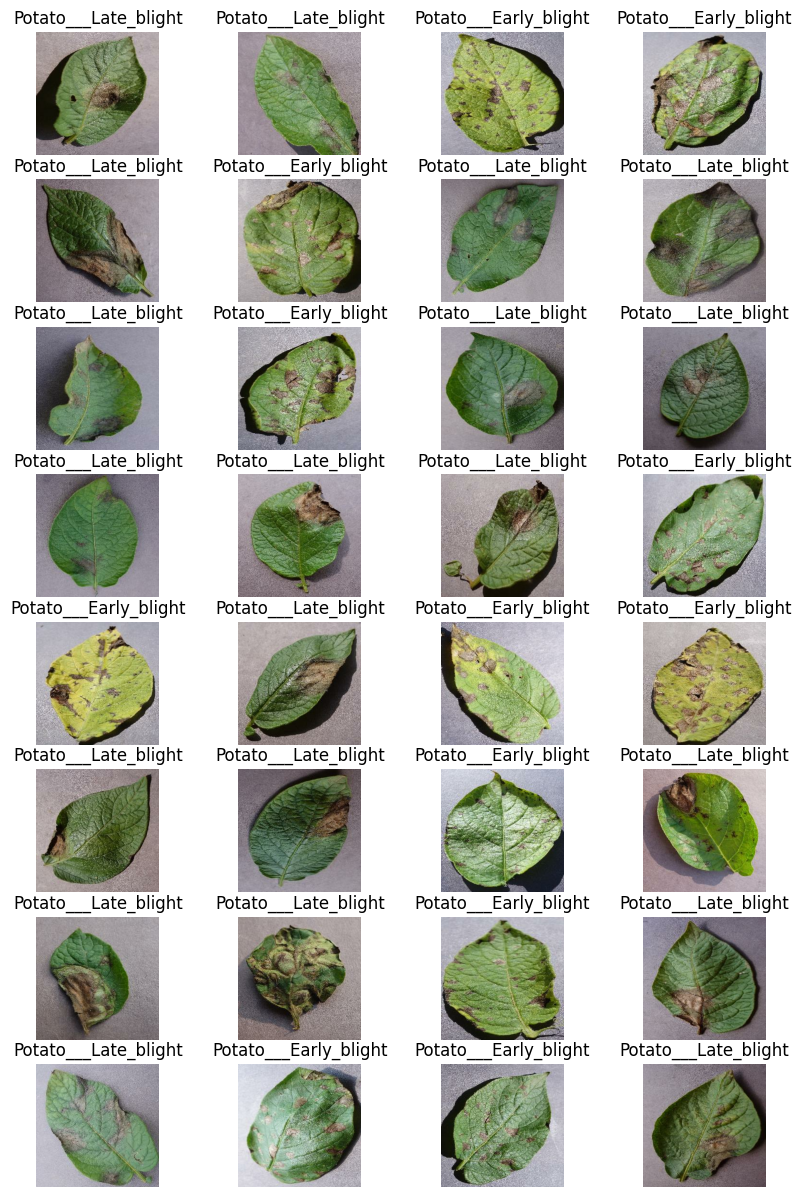

In [30]:
# visualize the data
# 1 batch have 32 element (8,4)
plt.figure(figsize=(10,15))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(32):
        ax = plt.subplot(8,4,i+1)
        plt.title(class_names[labels_batch[i]])
        plt.imshow(image_batch[i].numpy().astype("uint8"))

        plt.axis("off")

`plt.figure(figsize=(10,15))` creates a new Matplotlib figure with a specific size of 10 inches in width and 15 inches in height. This sets up the canvas for plotting multiple subplots (images).

`for image_batch, labels_batch in dataset.take(1):` iterates through the dataset, where `dataset` seems to be an object representing a batch of images and labels. It takes only one batch of data using `take(1)`.

`print(image_batch.shape)` prints the shape of the image batch. This is useful to understand the dimensions of the data in the batch.

`print(labels_batch.numpy())` prints the labels of the batch as a NumPy array. It seems that the labels are represented as numerical values.

The code then enters a loop that iterates over each element in the batch. Since the batch size is 32 (as mentioned in your comment), this loop will run 32 times.

`ax = plt.subplot(8,4,i+1)` sets up a subplot in an 8x4 grid, and `i+1` is used to increment the subplot index for each image in the batch.

`plt.title(class_names[labels_batch[i]])` sets the title of the subplot based on the class name corresponding to the label of the current image. It appears that `class_names` is a list or dictionary that maps class labels to their names.

`plt.imshow(image_batch[i].numpy().astype("uint8"))` displays the current image using Matplotlib's `imshow` function. 

`image_batch[i]` is the i-th image in the batch. `.numpy()` is used to convert it to a NumPy array, and `.astype("uint8")` is used to ensure that the pixel values are treated as unsigned 8-bit integers, which is a common format for image data.

`plt.axis("off")` removes the axis labels and ticks from the subplot, making it look like an image rather than a typical plot.

This loop repeats for all 32 images in the batch, displaying them in a grid of 8 rows and 4 columns within the Matplotlib figure. Each subplot shows an image along with its corresponding class label.

This useful for visualizing a small batch of data during the initial stages of training or for debugging in a computer vision project. It helps you verify that your data loading and preprocessing pipeline is working as expected.

In [31]:
# totle image is 2070
# batch_size = 32
# totle iteration = 2070/32 -int(67.25) == 68
2152/32

67.25

In [32]:
len(dataset)

68

In [33]:
# split the data into train, test, validation data
# train data is 80%
# test data is 20%
#   - validation data 10%
#   - test data 10%

# train data(len(dataset)*0.8) => 68*0.8 = 54.40
# validation data (len(dataset)*10) => 68*0.1 = 6.8
# test data
# (train data + validation data + test data) = 1

In [34]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [35]:
# 0-54 all batch is include all train_ds
train_ds = dataset.take(54) # arr[:54]
len(train_ds)

54

In [36]:
test_ds = dataset.skip(54) # arr[54:]
len(test_ds)

14

In [37]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
# val_ds
val_ds = test_ds.take(6)
len(val_ds)

In [39]:
# test_ds
test_ds = test_ds.skip(6)
len(test_ds)

8

In [40]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert(train_split+test_split+val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    test_split = int(test_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [41]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

The function called `get_dataset_partitions_tf` that is used to split a given dataset into training, validation, and test sets for TensorFlow. The function also supports shuffling the dataset before splitting it. Here's a breakdown of the code:

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert(train_split + test_split + val_split) == 1


This function takes several parameters:
   `ds`: The input dataset that you want to split.
   `train_split`: The proportion of data to be allocated to the training set (default is 0.8 or 80%).
   `val_split`: The proportion of data to be allocated to the validation set (default is 0.1 or 10%).
   `test_split`: The proportion of data to be allocated to the test set (default is 0.1 or 10%).
   `shuffle`: A boolean flag indicating whether to shuffle the dataset (default is `True`).
   `shuffle_size`: The size of the shuffle buffer if shuffling is enabled (default is 10,000).

ds_size = len(ds)

This line calculates the total size of the input dataset `ds`.

if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

If the `shuffle` parameter is set to `True`, the code shuffles the dataset `ds` using a buffer size of `shuffle_size` and a fixed seed value of 12. This step randomizes the order of the data.

train_size = int(train_split * ds_size)
val_size = int(val_split * ds_size)
test_size = int(test_split * ds_size)


These lines calculate the absolute sizes (number of elements) for the training, validation, and test sets based on the specified proportions and the total size of the dataset.

train_ds = ds.take(train_size)
val_ds = ds.skip(train_size).take(val_size)
test_ds = ds.skip(train_size).skip(val_size)

The code uses TensorFlow's `take` and `skip` methods to split the dataset into the desired partitions:
   `train_ds` contains the first `train_size` elements from the shuffled dataset.
   `val_ds` contains the next `val_size` elements from the shuffled dataset after skipping the training data.
   `test_ds` contains the remaining elements from the shuffled dataset after skipping both training and validation data.

return train_ds, val_ds, test_ds

the function returns three TensorFlow datasets: `train_ds`, `val_ds`, and `test_ds`, which represent the training, validation, and test sets, respectively.

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

Call the `get_dataset_partitions_tf` function with the `dataset` as input and store the resulting partitions in `train_ds`, `val_ds`, and `test_ds`. These can then be used for training and evaluating a machine learning model.

Remember that the sum of `train_split`, `val_split`, and `test_split` should be equal to 1 to ensure that the entire dataset is split without any data being left out.

In [42]:
print('train_ds_size :',len(train_ds))
print('val_ds_size :',len(val_ds))
print('test_ds_size :',len(test_ds))

train_ds_size : 54
val_ds_size : 6
test_ds_size : 8


In [43]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

`.cache()`: This method caches the elements of the dataset, which means it stores them in memory or another faster storage medium for quicker access during training. Caching can significantly speed up data loading if the dataset is relatively small and fits in memory.

`.shuffle(1000)`: This method shuffles the elements of the dataset randomly. In this case, it shuffles the dataset with a buffer size of 1000. Shuffling the data is essential in training machine learning models because it ensures that the model doesn't learn patterns based on the order of the data.

`.prefetch(buffer_size=tf.data.AUTOTUNE)`: This method prefetches data from the dataset to overlap data loading and model execution. The `buffer_size` parameter determines how many elements to prefetch. In this code, `tf.data.AUTOTUNE` is used for the buffer size, which allows TensorFlow to dynamically adjust the prefetch buffer size based on available system resources. This can help improve overall training efficiency by minimizing idle time between data loading and processing.

So, takes three datasets (`train_ds`, `val_ds`, and `test_ds`), applies caching, shuffles the data with a buffer size of 1000, and prefetches data with a buffer size determined by TensorFlow's autotuning mechanism to optimize data loading and model training efficiency. This is a common preprocessing step pipelines to prepare data for training and testing models.

In [ ]:
# use to know the shape of first img of first batch from the dataset  
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].shape)

# image preprocessing

In [45]:
image_size = 256

In [ ]:
# resize the image in (256, 256,3)
# rescaling the data 1/255
# add new layer in cnn architecture
# creating keras layers for resizing and scaling

resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(image_size, image_size),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

This Sequential model for image preprocessing. This model is designed to resize and rescale images.

`tf.keras.Sequential([])`: This line initializes a Sequential model. In Keras, a Sequential model is a linear stack of layers that you can add to one by one.

`tf.keras.layers.experimental.preprocessing.Resizing(image_size, image_size)`: This line adds a resizing layer to the Sequential model. The `Resizing` layer is part of the `experimental.preprocessing` module in TensorFlow. It takes two arguments: `image_size` and `image_size`, which are typically integers representing the desired height and width for resizing images. This layer is used to resize input images to the specified dimensions (`image_size`, `image_size`) during preprocessing.

`tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)`: This line adds a rescaling layer to the Sequential model. 
    
`Rescaling` layer is also part of the `experimental.preprocessing` module. It's used to scale the pixel values of the input images. In this case, it scales the pixel values by dividing them by 255. This operation is commonly used to normalize pixel values from the range [0, 255] to the range [0, 1], which is a common preprocessing step for neural networks that work with images.

So, Sequential model with two preprocessing layers: one for resizing images to a specified size (`image_size`, `image_size`), and the other for rescaling pixel values to the range [0, 1] by dividing them by 255. This model can be used as a preprocessing step before feeding images into a neural network for tasks like image classification, object detection, or any other image-based machine learning task.

In [ ]:
# data augmentation
# Data augmentation is a common technique used in machine learning, especially in computer vision tasks, to artificially 
#   increase the size of the training dataset by applying various random transformations to the input data.

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
])

This Sequential model in TensorFlow's Keras API for data augmentation. Data augmentation is a common technique used in machine learning, especially in computer vision tasks, to artificially increase the size of the training dataset by applying various random transformations to the input data. Let's break down the code step by step:

`tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")`: This line adds a RandomFlip layer to the Sequential model. The `RandomFlip` layer is part of the `experimental.preprocessing` module in TensorFlow. It applies random horizontal and vertical flips to the input data with a certain probability during training. Flipping an image horizontally means reversing it left to right, and flipping it vertically means reversing it top to bottom. This helps introduce variations in the training data, making the model more robust.

`tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)`: This line adds a RandomRotation layer to the Sequential model. The `RandomRotation` layer is also part of the `experimental.preprocessing` module. It applies a random rotation to the input data by a specified angle, in this case, 0.3 radians (which is approximately 17 degrees). The rotation is applied randomly during training, helping the model become invariant to small rotations in the input data.

So, Sequential model with two data augmentation layers: one for random horizontal and vertical flips and another for random rotations. These layers are applied with certain probabilities during training to augment the dataset and improve the model's ability to generalize to different variations of the input data. This is commonly used in image classification and other computer vision tasks.

In [48]:
print(batch_size, image_size, image_size, channels)

32 256 256 3


# CNN model

In [49]:
input_shape = (batch_size, image_size, image_size, channels)
n_classes = 3

model= models.Sequential([

    # layer 1
    resize_and_rescale,

    # layer 2
    data_augmentation,

    # layer 3 : Conv2D
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),

    # layer 4 : MaxPooling layer
    layers.MaxPooling2D((2,2)),

    # layer 5 : Conv2D
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),

    # layer 6 : MaxPooling layer
    layers.MaxPooling2D((2,2)),

    # layer 7 : Conv2D
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),

    # layer 8 : MaxPooling layer
    layers.MaxPooling2D((2,2)),

    # layer 9 : Conv2D
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),

    # layer 10 : MaxPooling layer
    layers.MaxPooling2D((2,2)),

    # layer 11 : Conv2D
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),

    # layer 12 : MaxPooling layer
    layers.MaxPooling2D((2,2)),

    # layer 13 : Conv2D
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),

    # layer 14 : MaxPooling layer
    layers.MaxPooling2D((2,2)),

    # layer 15 : flatten layer
    layers.Flatten(),

    # layer 16 : fullyConnected layer
    layers.Dense(64, activation='relu'),

    # layer 17 : output layer
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

`input_shape`: This line defines the input shape for the model. It specifies the shape of the input data, including the batch size, image dimensions, and the number of color channels (e.g., RGB channels for a color image).

`n_classes`: This variable defines the number of output classes for the classification task. In this case, it's set to 3, which means the model will classify images into one of three classes.

`model = models.Sequential([...])`: This block of code initializes a Sequential model, which is a linear stack of layers. The layers are added one after another to define the architecture of the CNN model.

`resize_and_rescale` and `data_augmentation`: These are the preprocessing layers that you defined earlier. `resize_and_rescale` resizes and rescales the input images, and `data_augmentation` applies random data augmentation techniques.

The following layers represent the architecture of the CNN:

    Layers 3, 5, 7, 9, 11, 13: These are Convolutional layers (`layers.Conv2D`). Each layer applies convolutional operations to the input data, extracting features from the images. The number of filters (32 and 64 in your code) and the kernel size (3x3 in your code) are specified for each layer. The ReLU activation function (`activation='relu'`) is applied to introduce non-linearity.

    Layers 4, 6, 8, 10, 12, 14: These are MaxPooling layers (`layers.MaxPooling2D`). Max-pooling is a downsampling operation that reduces the spatial dimensions of the feature maps, helping the model learn hierarchical representations of the input data.

    Layer 15: This is a Flatten layer (`layers.Flatten`) that flattens the output from the previous convolutional layers into a 1D vector. This is necessary to connect the convolutional layers to the fully connected layers.

    Layer 16: This is a fully connected layer (`layers.Dense`) with 64 units and ReLU activation. It takes the flattened output and applies a linear transformation with a ReLU activation function.

    Layer 17: This is the output layer (`layers.Dense`) with `n_classes` (3 in your case) units and a softmax activation function. It produces the final class probabilities for each input image, making it suitable for multi-class classification.

`model.build(input_shape=input_shape)`: This line builds the model by specifying the input shape. It ensures that the model's weights and architecture are constructed and ready to be trained.

CNN model for image classification with several convolutional layers, max-pooling layers, and fully connected layers. It also includes data preprocessing steps to resize, rescale, and apply data augmentation to the input images. The output layer provides class probabilities for multi-class classification tasks.

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

The `model.summary()` function in TensorFlow's Keras API provides a concise summary of the architecture of your neural network model. It displays information about each layer in the model, including the layer's name, type, output shape, and the number of parameters it has.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #
_________________________________________________________________
sequential (Sequential)      (None, image_size, image_size, channels)
_________________________________________________________________
sequential_1 (Sequential)    (None, image_size, image_size, channels)
_________________________________________________________________
conv2d (Conv2D)              (None, image_size-2, image_size-2, 32)    896
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, (image_size-2)/2, (image_size-2)/2, 32) 0
_________________________________________________________________
conv2d_1 (Conv2D)            (None, (image_size-2)/2-2, (image_size-2)/2-2, 64) 18496
_________________________________________________________________
max_pooling2d_1 (MaxPooling2D) (None, ((image_size-2)/2-2)/2, ((image_size-2)/2-2)/2, 64) 0
_________________________________________________________________
conv2d_2 (Conv2D)            (None, ((image_size-2)/2-2)/2-2, ((image_size-2)/2-2)/2-2, 64) 36928
_________________________________________________________________
max_pooling2d_2 (MaxPooling2D) (None, (((image_size-2)/2-2)/2-2)/2, (((image_size-2)/2-2)/2-2)/2, 64) 0
_________________________________________________________________
conv2d_3 (Conv2D)            (None, (((image_size-2)/2-2)/2-2)/2-2, (((image_size-2)/2-2)/2-2)/2-2, 64) 36928
_________________________________________________________________
max_pooling2d_3 (MaxPooling2D) (None, ((((image_size-2)/2-2)/2-2)/2-2)/2, ((((image_size-2)/2-2)/2-2)/2-2)/2, 64) 0
_________________________________________________________________
conv2d_4 (Conv2D)            (None, ((((image_size-2)/2-2)/2-2)/2-2)/2-2)/2, ((((image_size-2)/2-2)/2-2)/2-2)/2, 64) 36928
_________________________________________________________________
max_pooling2d_4 (MaxPooling2D) (None, (((((image_size-2)/2-2)/2-2)/2-2)/2-2)/2, (((((image_size-2)/2-2)/2-2)/2-2)/2-2)/2, 64) 0
_________________________________________________________________
conv2d_5 (Conv2D)            (None, (((((image_size-2)/2-2)/2-2)/2-2)/2-2)/2, (((((image_size-2)/2-2)/2-2)/2-2)/2-2)/2, 64) 36928
_________________________________________________________________
max_pooling2d_5 (MaxPooling2D) (None, (((((((image_size-2)/2-2)/2-2)/2-2)/2-2)/2-2)/2-2)/2, (((((((image_size-2)/2-2)/2-2)/2-2)/2-2)/2-2)/2, 64) 0
_________________________________________________________________
flatten (Flatten)            (None, 64)                0
_________________________________________________________________
dense (Dense)                (None, 64)                4160
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195
_________________________________________________________________
Total params:
Trainable params: 
Non-trainable params: 

"Layer (type)": This column shows the name and type of each layer in the model.

"Output Shape": This column displays the shape of the output produced by each layer. For convolutional layers, it includes the dimensions of the feature maps.

"Param #": This column shows the number of parameters (learnable weights) in each layer. These parameters are updated during training to make the model learn from the data.

"Total params": This line shows the total number of trainable parameters in the model.

"Trainable params": This line shows the number of parameters that will be updated during training.

"Non-trainable params": This line shows the number of parameters that are not trainable (e.g., parameters in the preprocessing layers).

This provides a useful overview of your model's architecture and can be helpful for debugging and optimizing your neural network.

In [51]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

The `model.compile()` function in TensorFlow is used to configure the training process for your neural network model. It specifies several key components for training, including the optimizer, loss function, and evaluation metrics.

`optimizer='adam'`: This line specifies the optimizer to be used during training. In this case, it's set to 'adam,' which refers to the Adam optimizer. Adam is a popular optimization algorithm that adapts the learning rate during training, making it efficient and effective for training deep neural networks.

`loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)`: This line defines the loss function that the model will use during training. You've chosen `SparseCategoricalCrossentropy` as the loss function. This loss function is commonly used for multi-class classification tasks where the target labels are integers (e.g., 0, 1, 2) and not one-hot encoded. Setting `from_logits=False` means that the model's output is expected to be raw class probabilities (after applying softmax) rather than logits. The loss function calculates the error between the predicted probabilities and the actual labels.

`metrics=['accuracy']`: This line specifies the evaluation metric(s) to be monitored during training. In this case, you've chosen 'accuracy,' which calculates the accuracy of the model's predictions on the training data. It represents the proportion of correctly classified examples.

After configuring these settings, your model is ready for training using the specified optimizer, loss function, and evaluation metric(s). You can then use the `model.fit()` function to train the model on your training dataset by providing the training data and labels.

In [52]:
# fit the model
history = model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=epochs
)

Epoch 1/35
54/54 [==============================] - 22s 94ms/step - loss: 0.9206 - accuracy: 0.4821 - val_loss: 0.8676 - val_accuracy: 0.4635
Epoch 2/35
54/54 [==============================] - 3s 59ms/step - loss: 0.7466 - accuracy: 0.6383 - val_loss: 0.4668 - val_accuracy: 0.7865
Epoch 3/35
54/54 [==============================] - 3s 59ms/step - loss: 0.4752 - accuracy: 0.7870 - val_loss: 0.3448 - val_accuracy: 0.8542
Epoch 4/35
54/54 [==============================] - 3s 59ms/step - loss: 0.3284 - accuracy: 0.8663 - val_loss: 0.2478 - val_accuracy: 0.8906
Epoch 5/35
54/54 [==============================] - 3s 58ms/step - loss: 0.3191 - accuracy: 0.8738 - val_loss: 0.2550 - val_accuracy: 0.8906
Epoch 6/35
54/54 [==============================] - 3s 58ms/step - loss: 0.2635 - accuracy: 0.8929 - val_loss: 0.1675 - val_accuracy: 0.9323
Epoch 7/35
54/54 [==============================] - 3s 61ms/step - loss: 0.2979 - accuracy: 0.8837 - val_loss: 0.2333 - val_accuracy: 0.9167
Epoch 8/35
5

This use to train your neural network model using TensorFlow's Keras API.

`model.fit()`: This function starts the training process for your model.

`train_ds`: This is the training dataset that you're using to train your model. It should contain input images and their corresponding labels.

`batch_size`: This is the batch size for training. It determines how many samples are processed in each forward and backward pass during training. It can impact memory usage and training speed.

`validation_data`: This parameter allows you to specify a validation dataset. The model's performance on this dataset will be monitored during training to assess its generalization performance and detect overfitting.

`verbose=1`: This parameter controls the verbosity of the training output. Setting it to `1` means that you will see training progress information displayed in the console during training.

`epochs`: This parameter specifies the number of training epochs, which is the number of times the entire training dataset is processed by the model. Each epoch consists of multiple batches of data.

When you run this code, your model will be trained using the training dataset (`train_ds`) with the specified batch size, and its performance will be evaluated on the validation dataset (`val_ds`) at the end of each epoch. The training process will run for the number of specified epochs.

During training, the model will adjust its weights (parameters) based on the loss computed between its predictions and the ground truth labels. The goal is to minimize the loss, improving the model's ability to make accurate predictions.

The training process will produce a `history` object, which contains information about the training progress, including loss and accuracy values for each epoch. You can use this information to visualize how your model is learning and whether it is overfitting or underfitting.

In [53]:
# apply test data
scores = model.evaluate(test_ds)
scores

8/8 [==============================] - 2s 27ms/step - loss: 0.1674 - accuracy: 0.9297


[0.16737617552280426, 0.9296875]

In [54]:
history.params

{'verbose': 1, 'epochs': 35, 'steps': 54}

In [55]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [56]:
history.history['accuracy']

[0.48206019401550293,
 0.6383101940155029,
 0.7870370149612427,
 0.8663194179534912,
 0.8738425970077515,
 0.8929398059844971,
 0.8836805820465088,
 0.9166666865348816,
 0.9224537014961243,
 0.9328703880310059,
 0.9403935074806213,
 0.9612268805503845,
 0.9693287014961243,
 0.9785879850387573,
 0.9756944179534912,
 0.9797453880310059,
 0.9716435074806213,
 0.9739583134651184,
 0.9826388955116272,
 0.9675925970077515,
 0.9623842835426331,
 0.9722222089767456,
 0.9814814925193787,
 0.9884259104728699,
 0.9861111044883728,
 0.9780092835426331,
 0.9826388955116272,
 0.9890046119689941,
 0.9901620149612427,
 0.9930555820465088,
 0.9895833134651184,
 0.9907407164573669,
 0.9681712985038757,
 0.9878472089767456,
 0.9861111044883728]

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [58]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(epochs), acc, label="Training Accuracy")
plt.plot(range(epochs), val_acc, label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs), loss, label="Training Loss")
plt.plot(range(epochs), val_loss, label="Validation Loss")
plt.legend(loc='upper right')
plt.title('training and validation loss')
plt.show()

In [59]:
print(labels_batch)

tf.Tensor([1 1 0 0 0 0 0 0 0 1 2 1 2 1 0 1 1 1 0 0 1 1 0 0 0 2 1 0 1 0 0 0], shape=(32,), dtype=int32)


In [60]:
print(image_batch.shape)

(32, 256, 256, 3)


First image to predict
Actual Label: Potato___Late_blight
1/1 [==============================] - 0s 217ms/step
Predicted Label: Potato___Late_blight


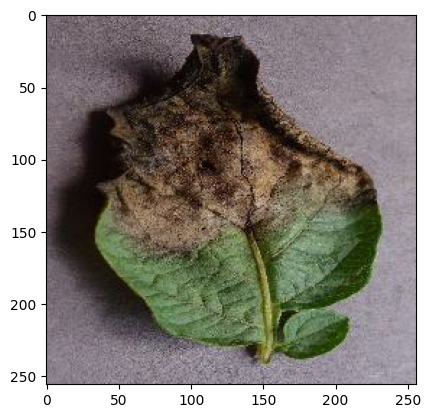

In [61]:
import numpy as np
for image_batch, labels_batch in test_ds.take(1):

    first_image = image_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label:", class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("Predicted Label:", class_names[np.argmax(batch_prediction[0])])

This used to make predictions using your trained neural network model on a batch of test images from the `test_ds` dataset. It also displays the actual and predicted labels for the first image in the batch.

`for image_batch, labels_batch in test_ds.take(1):`: This loop iterates over the first batch of images and labels from the `test_ds` dataset using the `take(1)` method. It allows you to work with a small subset of the test dataset for demonstration purposes.

`first_image = image_batch[0].numpy().astype("uint8")`: This line extracts the first image from the batch, converts it to a NumPy array, and specifies the data type as "uint8" (unsigned 8-bit integer). This is done to ensure that the image can be displayed properly using Matplotlib.

`first_label = labels_batch[0].numpy()`: This line extracts the actual label for the first image in the batch, converts it to a NumPy array, and stores it in the `first_label` variable.

`plt.imshow(first_image)`: This line uses Matplotlib to display the first image in the batch.

`print("Actual Label:", class_names[first_label])`: This line prints the actual label of the first image using the `class_names` list. It assumes that `class_names` contains the human-readable class names corresponding to the numerical labels.

`batch_prediction = model.predict(image_batch)`: This line uses your trained model to make predictions on the entire batch of images (`image_batch`). The result is stored in the `batch_prediction` variable, which contains predicted class probabilities for each image in the batch.

`print("Predicted Label:", class_names[np.argmax(batch_prediction[0])])`: This line prints the predicted label for the first image in the batch. It uses `np.argmax()` to find the index of the class with the highest predicted probability and maps it to the corresponding class name using `class_names`.

This allows you to visually inspect the model's predictions for a sample image from the test dataset and compare them to the actual label. It's a useful way to verify how well the model is performing on unseen data.

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])), 2)
    return predicted_class, confidence

The `predict` function you've provided is a custom function designed to make predictions using a given neural network model (`model`) on a single image (`img`). It takes an image as input, preprocesses it, and then uses the model to predict the class label and confidence score for that image.

`img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())`: This line converts the input image (`img`) to a NumPy array using the `img_to_array` function from `tf.keras.preprocessing.image`. It assumes that `images[i]` is a TensorFlow tensor representing the image.

`img_array = tf.expand_dims(img_array, 0)`: This line adds an extra dimension to the image array to match the shape expected by the model. The model typically expects a batch of images as input, so you're converting a single image into a batch with a size of 1.

`predictions = model.predict(img_array)`: This line uses the provided `model` to make predictions on the preprocessed image. The 

`model.predict` function takes the input image (or batch of images) and returns predicted class probabilities.

`predicted_class = class_names[np.argmax(predictions[0])]`: This line finds the index of the class with the highest predicted probability using `np.argmax(predictions[0])` and maps it to the corresponding class name using the `class_names` list. This gives you the predicted class label.

`confidence = round(100 * (np.max(predictions[0])), 2)`: This line calculates the confidence or probability associated with the predicted class label. It takes the maximum predicted probability (confidence) from the `predictions` array, multiplies it by 100 to convert it to a percentage, and rounds it to two decimal places.

the function returns `predicted_class` (the predicted class label) and `confidence` (the confidence score).

You can use this `predict` function to make predictions on individual images using your trained model. Simply pass the model and the image you want to predict as arguments, and it will return the predicted class and confidence score for that image.

1/1 [==============================] - 0s 21ms/step


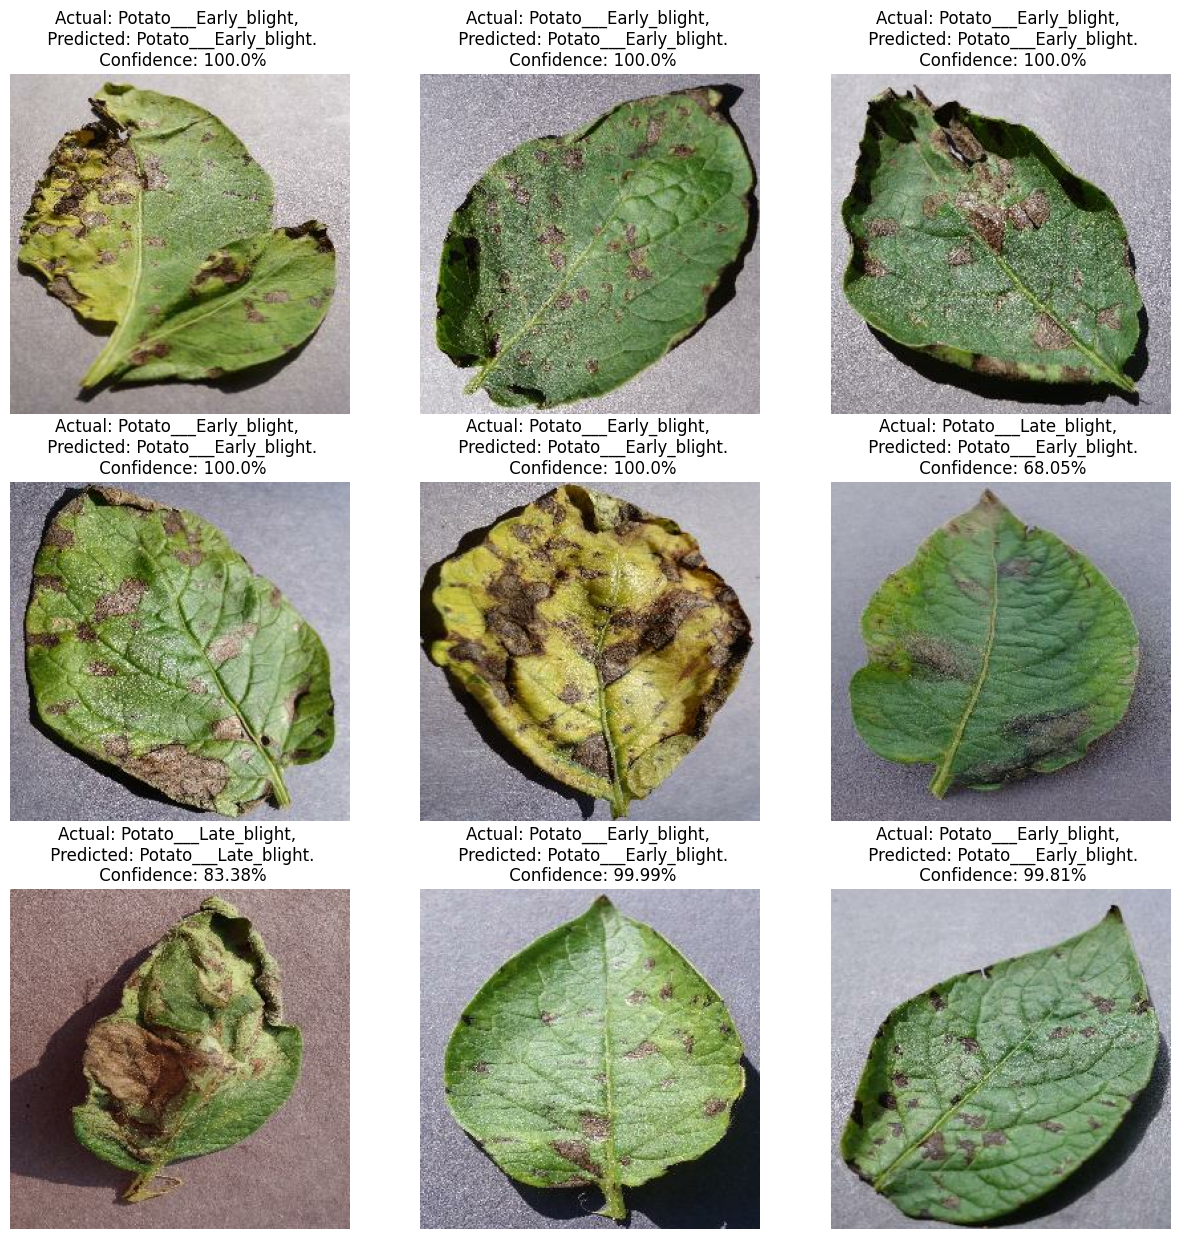

In [63]:
plt.figure(figsize= (15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i +1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

This used to create a visual representation of predictions made by your neural network model on a batch of test images from the `test_ds` dataset. It displays a 3x3 grid of images along with their actual labels, predicted labels, and confidence scores. Here's a breakdown of what each part of the code does:

`plt.figure(figsize=(15, 15))`: This line creates a new Matplotlib figure with a specified figure size of 15x15 inches.

`for images, labels in test_ds.take(1):`: This loop iterates over the first batch of images and labels from the `test_ds` dataset using the `take(1)` method. It allows you to work with a small subset of the test dataset for visualization.

`for i in range(9):`: This nested loop iterates over the first 9 images in the batch.

   `ax = plt.subplot(3, 3, i + 1)`: This line creates a subplot within the 3x3 grid. It specifies the position of the current subplot within the grid using the `i` index.

   `plt.imshow(images[i].numpy().astype("uint8"))`: This line displays the current image from the batch using Matplotlib. The `astype("uint8")` conversion is done to ensure that the image is displayed correctly.

   `predicted_class, confidence = predict(model, images[i].numpy())`: This line uses the `predict` function you defined earlier to get the predicted class and confidence score for the current image.

   `actual_class = class_names[labels[i]]`: This line retrieves the actual class label for the current image from the `class_names` list using the ground truth label (`labels[i]`).

   `plt.title(...)`: This line sets the title for the current subplot. It includes information about the actual class, predicted class, and confidence score for the image.

   `plt.axis("off")`: This line turns off the axis labels and ticks for the current subplot, so only the image and title are displayed.

generate a 3x3 grid of images, each with its actual label, predicted label, and confidence score. This visualization allows you to quickly assess how well your model is performing on a small sample of test data.

In [64]:
import os

In [66]:
model.save('/content/drive/MyDrive/cnn/models/')